# GAN(Generative Adversarial Nets)

## Import Module

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

## Set Parameters

torch.manual_seed(1)
np.random.seed(1)

BATCH_SIZE =64
LR_G = 0.0001 #generator
LR_D = 0.0001 #discriminator
N_IDEAS = 5
ART_COMPONENTS = 15
PAINT_POINTS = np.vstack([np.linspace(-1,1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])

### SUB: Show the painting rage

<function matplotlib.pyplot.show(*args, **kw)>

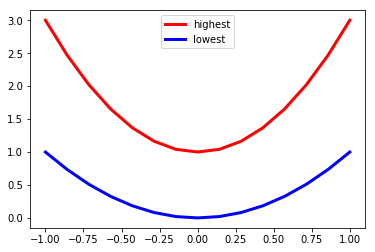

In [21]:
plt.plot(PAINT_POINTS[0], 2*np.power(PAINT_POINTS[0],2)+1, color='r',lw=3,label='highest')
plt.plot(PAINT_POINTS[0], 1*np.power(PAINT_POINTS[0],2)+0, color='b',lw=3,label='lowest')
plt.legend(loc='best')
plt.show

## Build Reference

In [31]:
def artist_works():
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    paintings = a * np.power(PAINT_POINTS, 2) + (a-1)
    labels = (a-1) > 0.5            # upper paintings (1), lower paintings (0), two classes
    paintings = torch.from_numpy(paintings).float()
    labels = torch.from_numpy(labels.astype(np.float32))
    return paintings, labels

## Build Models

### Generator

In [32]:
G = nn.Sequential(
     nn.Linear(N_IDEAS, 128),
     nn.ReLU(),
     nn.Linear(128, ART_COMPONENTS))

### Discriminator

In [33]:
D = nn.Sequential(
     nn.Linear(ART_COMPONENTS, 128),
     nn.ReLU(),
     nn.Linear(128, 1),
     nn.Sigmoid()
)

## Instance

In [34]:
opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)

In [30]:
for step in range(10000):
    artist_paintings = artist_works()
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS)
    G_paintings = G(G_ideas)
    
    prob_artist0 = D(artist_paintings)
    prob_artist1 = D(G_paintings)
    
    D_loss = -torch.mean(torch.log(prob_artist0)+torch.log(1.-prob_artist1))
    G_loss = torch.mean(torch.log(1.-prob_artist1))
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)      # reusing computational graph
    opt_D.step()

    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()

NameError: name 'artist_works_with_labels' is not defined

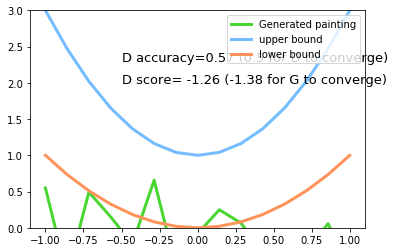

In [27]:
    if step % 50 == 0:  # plotting
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.01)